# Breast Cancer Prediction

# Introduction


Breast cancer is a type of cancer that starts in the cells of the breast. It can occur in both men and women but is more common in women. Breast cancer can be categorized as malignant or benign. Malignant breast cancer cells can invade nearby tissues and spread to other parts of the body, while benign breast tumors do not spread to other tissues and are not considered cancerous. Early detection of breast cancer can increase the patient's survival rate.


# Problem Statement

Diagnose whether the patient has breast cancer using the 32 features, i.e., its radius, area, perimeter, and texture. It's a 2-class problem, and machine learning classification models can be used for detecting whether the tumor is malignant or not (as malignant is a cancerous cell, we are interested in predicting it).

# About the data

This breast cancer dataset was obtained from the University of Wisconsin Hospitals, Madison, by Dr. William H. Wolberg and downloaded from kaggle. The features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. The features of the mass were then computed from the image to be used for analysis and prediction.

# Import the libraries and load the dataset

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
breastcancer=pd.read_csv("breastcancer.csv")
breastcancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# Count the rows and columns present in the data set


In [2]:
breastcancer.shape

(569, 33)

# Data Cleaning

1) Check for the missing values and drop if there are any

In [3]:
breastcancer.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

Now drop the "Unnamed: 32" column.
Also, drop the column "id," which is just an identification for the patient and is indeed not needed.

In [4]:
breastcancer.drop(["Unnamed: 32", "id"],axis=1, inplace=True)
breastcancer.head()   

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Diagnosis is a categorical variable with levels M and B.
We need to convert it to a dummy variable.

In [5]:
diagnosis_dummy = pd.get_dummies(breastcancer.diagnosis,prefix="diagnosis")

#concatinate the two datasets
breastcancer_dummy = pd.concat([breastcancer,diagnosis_dummy],axis=1)


breastcancer_dummy.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_B,diagnosis_M
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0,1
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0,1
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0,1
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0,1
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0,1


We can drop the redundant variables diagnosis, diagnosis_B

In [6]:
breastcancer_dummy.drop(["diagnosis", "diagnosis_B"],axis=1, inplace=True)
breastcancer_dummy.head()   

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_M
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [7]:
# get the column names
cols = list(breastcancer_dummy.columns)

# move the last column to the first position
cols = [cols[-1]] + cols[:-1]

# reindex the DataFrame with the new column order
breastcancer_dummy = breastcancer_dummy[cols]

# Data Analysis

We are interseted to predcit whether the cell is malignant(Cancerous) or not

In [8]:
diagnosis_counts = breastcancer_dummy.diagnosis_M.value_counts(normalize=True)
diagnosis_counts 


0    0.627417
1    0.372583
Name: diagnosis_M, dtype: float64

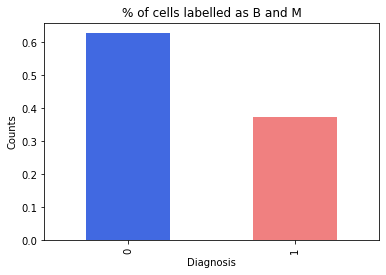

In [9]:
import matplotlib.pyplot as plt

colors = ['royalblue', 'lightcoral']

# Create a bar chart with the diagnosis counts
diagnosis_counts.plot(kind='bar',color=colors)
plt.title('% of cells labelled as B and M')
plt.xlabel('Diagnosis')
plt.ylabel('Counts')

# Display the chart
plt.show()

# % of cells labeled Benign 62.74 %
# % of cells labeled Malignant 37.26 %

Scatter plot between radius mean & perimeter mean.

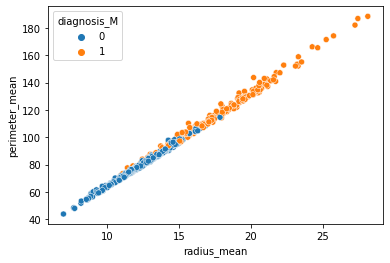

In [11]:
sns.scatterplot(data=breastcancer_dummy,x='radius_mean',y= 'perimeter_mean',hue='diagnosis_M')
plt.show()

Scatter plot between compactness and concave points.

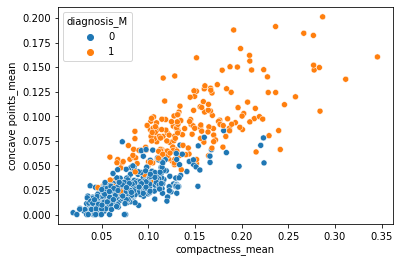

In [12]:
sns.scatterplot(data=breastcancer_dummy,x='compactness_mean',y= 'concave points_mean',hue='diagnosis_M')
plt.show()

pairplot of 10 mean features and diagnosis vartiable

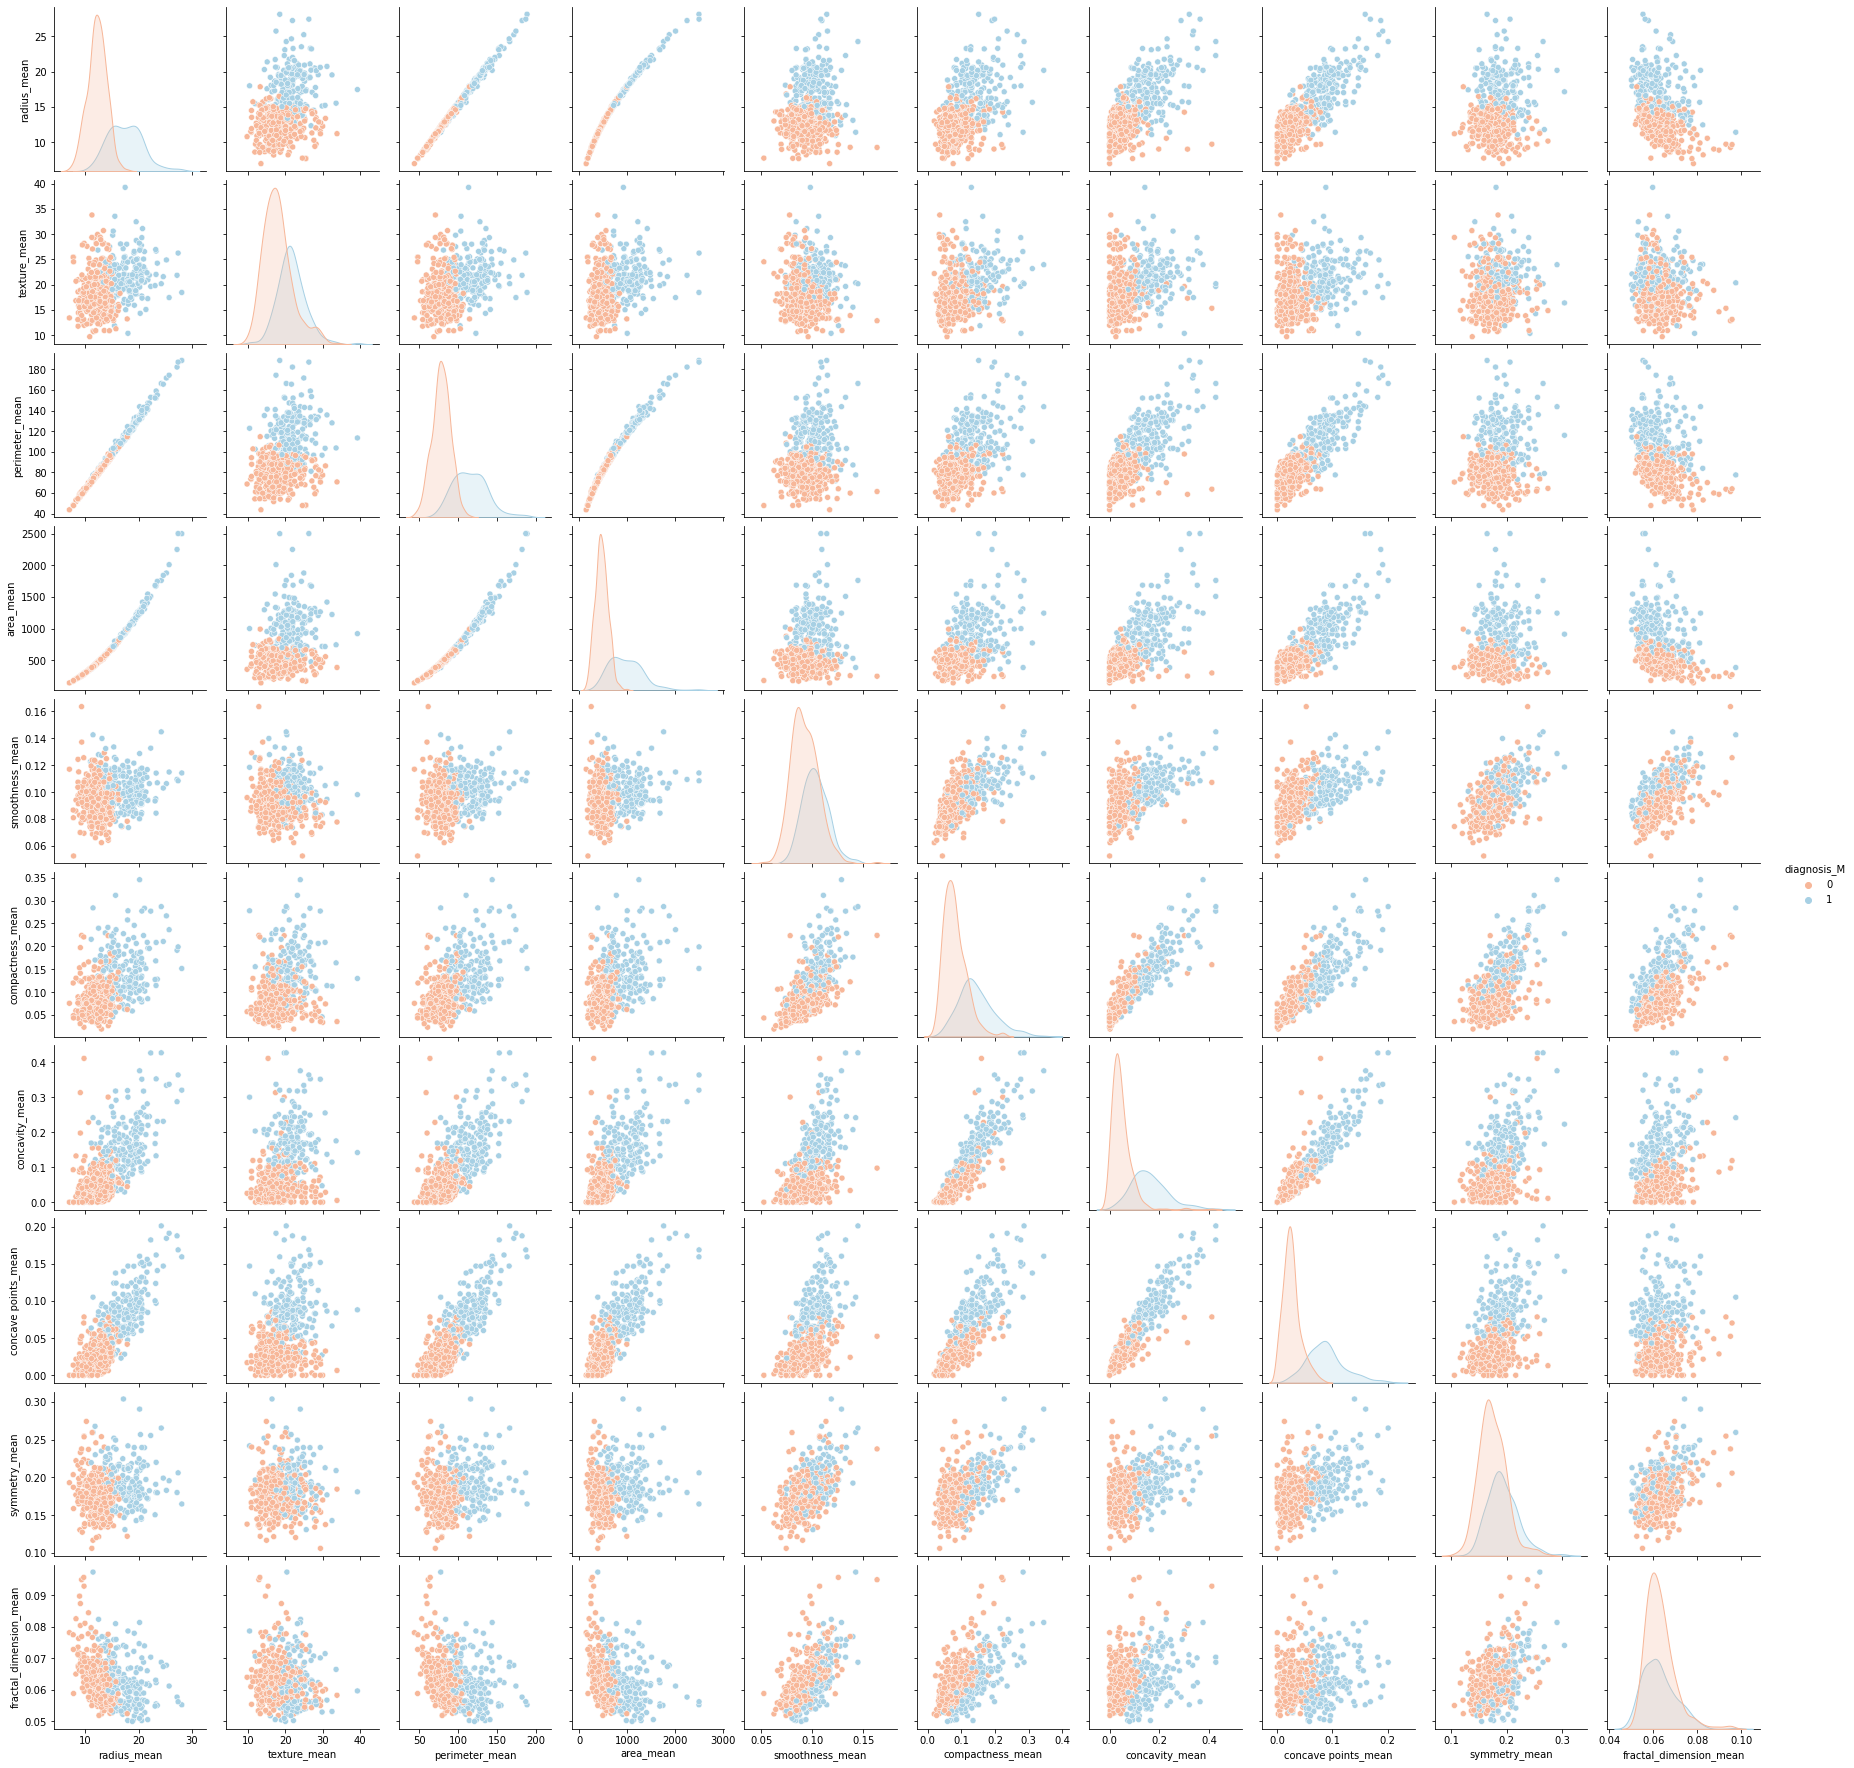

In [13]:
columns= ['diagnosis_M',
        'radius_mean', 
        'texture_mean', 
        'perimeter_mean', 
        'area_mean', 
        'smoothness_mean', 
        'compactness_mean', 
        'concavity_mean',
        'concave points_mean', 
        'symmetry_mean', 
        'fractal_dimension_mean']

sns.pairplot(data=breastcancer_dummy[columns], hue='diagnosis_M', palette='RdBu')

Summary of EDA:
1. From scatter plots we can see that, higher values of perimeter, radius, concave points, and compactness tend to be malignant.
2. Diagnosis_M is strongly associated with several features such as radius_mean, perimeter_mean, area_mean, concave points_mean, concavity_mean, and compactness_mean.
3.Multicollinearity issue is observed between features(this can be better examined with a correlation matrix).


# Feature Selection using correlation

In [14]:
breastcancer_cr = breastcancer_dummy.corr()
round(breastcancer_cr,2)

,diagnosis_M,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis_M,1.00,0.73,0.42,0.74,0.71,0.36,0.60,0.70,0.78,0.33,...,0.78,0.46,0.78,0.73,0.42,0.59,0.66,0.79,0.42,0.32
radius_mean,0.73,1.00,0.32,1.00,0.99,0.17,0.51,0.68,0.82,0.15,...,0.97,0.30,0.97,0.94,0.12,0.41,0.53,0.74,0.16,0.01
texture_mean,0.42,0.32,1.00,0.33,0.32,-0.02,0.24,0.30,0.29,0.07,...,0.35,0.91,0.36,0.34,0.08,0.28,0.30,0.30,0.11,0.12
perimeter_mean,0.74,1.00,0.33,1.00,0.99,0.21,0.56,0.72,0.85,0.18,...,0.97,0.30,0.97,0.94,0.15,0.46,0.56,0.77,0.19,0.05
area_mean,0.71,0.99,0.32,0.99,1.00,0.18,0.50,0.69,0.82,0.15,...,0.96,0.29,0.96,0.96,0.12,0.39,0.51,0.72,0.14,0.00
smoothness_mean,0.36,0.17,-0.02,0.21,0.18,1.00,0.66,0.52,0.55,0.56,...,0.21,0.04,0.24,0.21,0.81,0.47,0.43,0.50,0.39,0.50
compactness_mean,0.60,0.51,0.24,0.56,0.50,0.66,1.00,0.88,0.83,0.60,...,0.54,0.25,0.59,0.51,0.57,0.87,0.82,0.82,0.51,0.69
concavity_mean,0.70,0.68,0.30,0.72,0.69,0.52,0.88,1.00,0.92,0.50,...,0.69,0.30,0.73,0.68,0.45,0.75,0.88,0.86,0.41,0.51
concave points_mean,0.78,0.82,0.29,0.85,0.82,0.55,0.83,0.92,1.00,0.46,...,0.83,0.29,0.86,0.81,0.45,0.67,0.75,0.91,0.38,0.37
symmetry_mean,0.33,0.15,0.07,0.18,0.15,0.56,0.60,0.50,0.46,1.00,...,0.19,0.09,0.22,0.18,0.43,0.47,0.43,0.43,0.70,0.44


<AxesSubplot:>

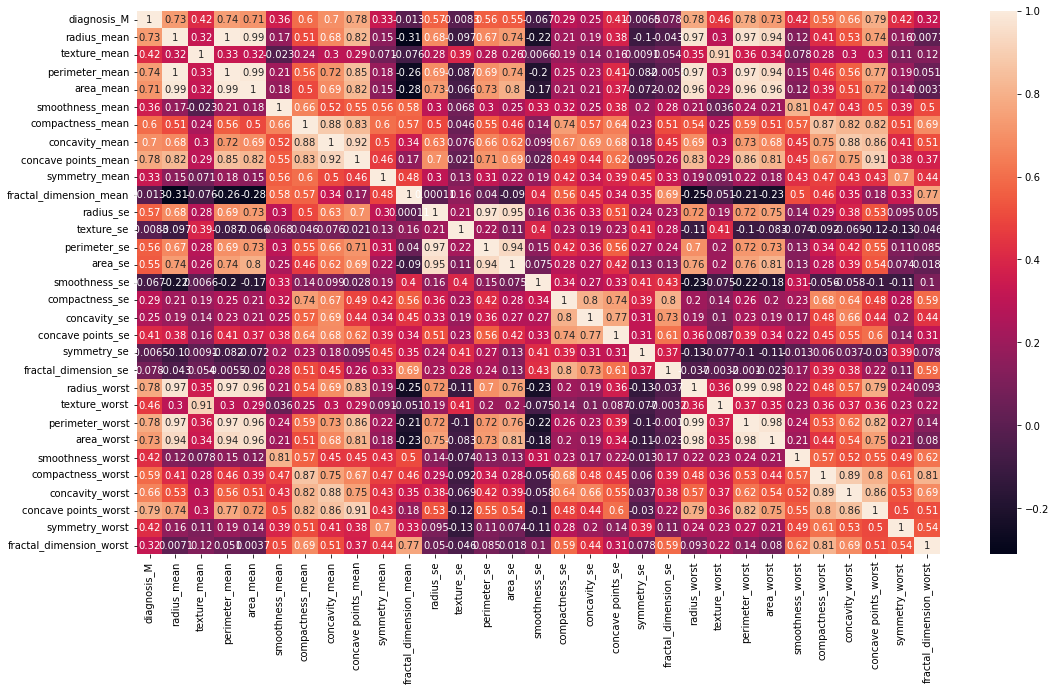

In [15]:
import seaborn as sns
plt.figure(figsize=(18,10))
sns.heatmap(breastcancer_cr,annot=True)


1) There is a high level of correlation between radius_mean, perimeter_mean, and area_mean, which indicates multicollinearity. So, we selected only one of these variables for analysis.

2) Similarly, there is a high level of correlation between concave points_mean, concavity_mean, and compactness_mean, which indicates multicollinearity. We choose only one of these variables for analysis.

3) The "worst" columns in the dataset are essentially a subset of the "mean" columns, and they represent the mean of the three largest values among all observations. Therefore, we excluded  the "worst" columns from the analysis and focussed on the other features.   

In [16]:
# dropped all "worst" columns
BreastCancer = breastcancer_dummy.iloc[:, :-10]

# verify remaining columns
BreastCancer.head()
BreastCancer.shape

(569, 21)

In [17]:
# dropped all columns coresponded to  "perimeter" and "area" features
BreastCancer.drop(["perimeter_mean", "area_mean","perimeter_se","area_se"],axis=1, inplace=True)
BreastCancer.head() 


,diagnosis_M,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se
0,1,17.99,10.38,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193
1,1,20.57,17.77,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532
2,1,19.69,21.25,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571
3,1,11.42,20.38,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208
4,1,20.29,14.34,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115


In [18]:
# dropped all columns related to concavity, concave_points features
BreastCancer.drop(["concavity_mean", "concavity_se","concave points_mean","concave points_se"],axis=1, inplace=True)
BreastCancer.head() 

,diagnosis_M,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,symmetry_se,fractal_dimension_se
0,1,17.99,10.38,0.11840,0.27760,0.2419,0.07871,1.0950,0.9053,0.006399,0.04904,0.03003,0.006193
1,1,20.57,17.77,0.08474,0.07864,0.1812,0.05667,0.5435,0.7339,0.005225,0.01308,0.01389,0.003532
2,1,19.69,21.25,0.10960,0.15990,0.2069,0.05999,0.7456,0.7869,0.006150,0.04006,0.02250,0.004571
3,1,11.42,20.38,0.14250,0.28390,0.2597,0.09744,0.4956,1.1560,0.009110,0.07458,0.05963,0.009208
4,1,20.29,14.34,0.10030,0.13280,0.1809,0.05883,0.7572,0.7813,0.011490,0.02461,0.01756,0.005115


In [20]:
# correlation after removing columns(now we have 12 features that will be using in our model)
breastcancer_corr = BreastCancer.corr()
round(breastcancer_corr,2)

,diagnosis_M,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,symmetry_se,fractal_dimension_se
diagnosis_M,1.00,0.73,0.42,0.36,0.60,0.33,-0.01,0.57,-0.01,-0.07,0.29,-0.01,0.08
radius_mean,0.73,1.00,0.32,0.17,0.51,0.15,-0.31,0.68,-0.10,-0.22,0.21,-0.10,-0.04
texture_mean,0.42,0.32,1.00,-0.02,0.24,0.07,-0.08,0.28,0.39,0.01,0.19,0.01,0.05
smoothness_mean,0.36,0.17,-0.02,1.00,0.66,0.56,0.58,0.30,0.07,0.33,0.32,0.20,0.28
compactness_mean,0.60,0.51,0.24,0.66,1.00,0.60,0.57,0.50,0.05,0.14,0.74,0.23,0.51
symmetry_mean,0.33,0.15,0.07,0.56,0.60,1.00,0.48,0.30,0.13,0.19,0.42,0.45,0.33
fractal_dimension_mean,-0.01,-0.31,-0.08,0.58,0.57,0.48,1.00,0.00,0.16,0.40,0.56,0.35,0.69
radius_se,0.57,0.68,0.28,0.30,0.50,0.30,0.00,1.00,0.21,0.16,0.36,0.24,0.23
texture_se,-0.01,-0.10,0.39,0.07,0.05,0.13,0.16,0.21,1.00,0.40,0.23,0.41,0.28
smoothness_se,-0.07,-0.22,0.01,0.33,0.14,0.19,0.40,0.16,0.40,1.00,0.34,0.41,0.43


<AxesSubplot:>

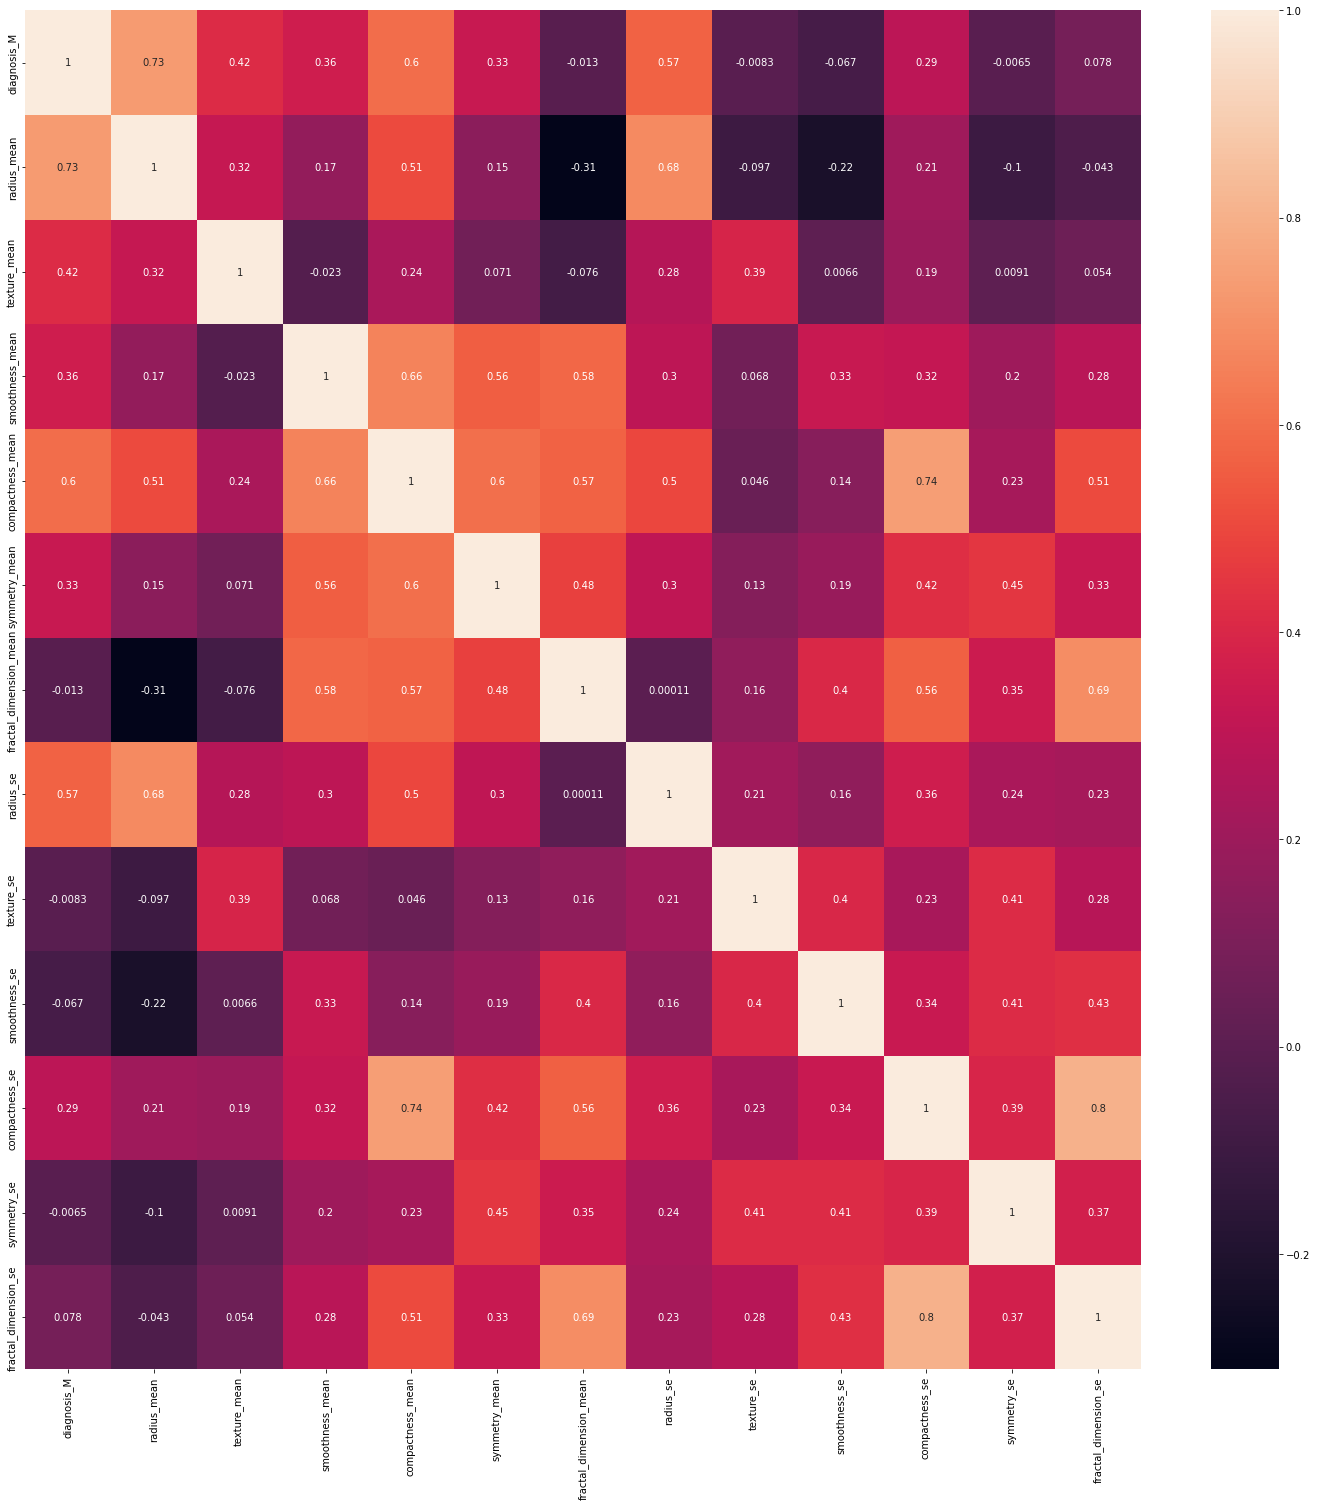

In [21]:
import seaborn as sns
plt.figure(figsize=(25,25))
sns.heatmap(breastcancer_corr,annot=True)

# Feature Extraction and Normalization

In [22]:
#extarct the features
X = BreastCancer.drop(['diagnosis_M'], axis=1)
y = BreastCancer['diagnosis_M']

Normalise the data. All the predictors we gonna put into our model, they basically going to have different units(ie they are measurement of different things)

In [23]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
X_scaled

array([[ 1.09706398, -2.07333501,  1.56846633, ...,  1.31686157,
         1.14875667,  0.90708308],
       [ 1.82982061, -0.35363241, -0.82696245, ..., -0.69292627,
        -0.80545038, -0.09944374],
       [ 1.57988811,  0.45618695,  0.94221044, ...,  0.8149735 ,
         0.23703554,  0.2935594 ],
       ...,
       [ 0.70228425,  2.0455738 , -0.84048388, ...,  0.66127727,
        -0.89141612,  0.03672674],
       [ 1.83834103,  2.33645719,  1.52576706, ...,  2.01771639,
         0.32663363,  0.90405707],
       [-1.80840125,  1.22179204, -3.11208479, ..., -1.16351619,
         0.75282996, -0.382754  ]])

In [24]:
#import the libraries
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

# Split the data and evaluate the model

In [25]:
#Now we have to split the data into training part and testing part
## we use train test with imbalanced classes so stratified splitting is used
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.30,random_state=42,stratify = y)

In [26]:
y_train.value_counts(normalize=True).sort_index()

0    0.628141
1    0.371859
Name: diagnosis_M, dtype: float64

In [27]:
y_test.value_counts(normalize=True).sort_index()

0    0.625731
1    0.374269
Name: diagnosis_M, dtype: float64

# Model1: Logistic Regression

In [29]:
model1= LogisticRegression(penalty='none')
model1.fit(X_train,y_train)

pred_probs_train1 = model1.predict_proba(X_train)
lr_training=roc_auc_score(y_train, pred_probs_train1[:,1])

pred_probs_test1 = model1.predict_proba(X_test)
lr_testing=roc_auc_score(y_test, pred_probs_test1[:,1])

print("Training accuracy is", lr_training)
print("Testing accuracy is", lr_testing)

Training accuracy is 0.9881891891891892
Testing accuracy is 0.9830607476635513


In [30]:
from sklearn.metrics import roc_auc_score, classification_report
y_pred1 = (pred_probs_test1[:,1] > 0.5).astype(int)
report1 = classification_report(y_test, y_pred1)
print(report1)

              precision    recall  f1-score   support

           0       0.93      0.94      0.94       107
           1       0.90      0.88      0.89        64

    accuracy                           0.92       171
   macro avg       0.91      0.91      0.91       171
weighted avg       0.92      0.92      0.92       171



# Model 2: Decision Trees

In [31]:
model2 = tree.DecisionTreeClassifier(random_state=42)
model2.fit(X_train,y_train)

pred_probs_train2 = model2.predict_proba(X_train)
tree_training=roc_auc_score(y_train, pred_probs_train2[:,1])

pred_probs_test2 = model2.predict_proba(X_test)
tree_testing=roc_auc_score(y_test, pred_probs_test2[:,1])

print("Training accuracy is", tree_training)
print("Testing accuracy is", tree_testing)

Training accuracy is 1.0
Testing accuracy is 0.8704731308411215


In [32]:
y_pred2 = (pred_probs_test2[:,1] > 0.5).astype(int)
report2 = classification_report(y_test, y_pred2)
print(report2)

              precision    recall  f1-score   support

           0       0.91      0.90      0.90       107
           1       0.83      0.84      0.84        64

    accuracy                           0.88       171
   macro avg       0.87      0.87      0.87       171
weighted avg       0.88      0.88      0.88       171



# Model 3: Random Forests

In [47]:
model3 = RandomForestClassifier(n_estimators=100, max_features='sqrt')
model3.fit(X_train,y_train)

pred_probs_train3 = model3.predict_proba(X_train)
randomforest_training=roc_auc_score(y_train, pred_probs_train3[:,1])

pred_probs_test3 = model3.predict_proba(X_test)
randomforest_testing=roc_auc_score(y_test, pred_probs_test3[:,1])

print("Training accuracy is", randomforest_training)
print("Testing accuracy is", randomforest_testing)

Training accuracy is 1.0
Testing accuracy is 0.9853971962616822


In [40]:
y_pred3 = (pred_probs_test3[:,1] > 0.5).astype(int)
report3 = classification_report(y_test, y_pred3)
print(report3)

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       107
           1       0.95      0.84      0.89        64

    accuracy                           0.92       171
   macro avg       0.93      0.91      0.92       171
weighted avg       0.93      0.92      0.92       171



# ROC_AUC_SCORE
Classifier           | Training error | Testing error|
---------------------|----------------|--------------|
Logistic             |     0.99       |     0.98     |
Decision trees       |     1          |     0.87     |
Random forests       |     1          |     0.99     |

When comes to training dataset the area under the curve for all models is high, with Logistic Regression being slightly lower. We can see that the Logistic Regression and Random Forest models performed well on the testing data set while the decision tree is overfitting.


# Precision and recall for Malignant
Classifier           | Precision      |    Recall    |
---------------------|----------------|--------------|
Logistic             |     0.90       |     0.88     |
Decision trees       |     0.85       |     0.88     |
Random forests       |     0.95       |     0.84     |

# Conclusion

Logistic regression is best in identifying malignant cells.
In this model, we detected 88% of the  malignant class and missed 12%  of the malignant tumors. 
Although there are other approaches we could explore to improve the recall of our model, by experimenting with different sets of variables, but we will conclude this report at this point.

Challenges:
There are many features and they are correlated with one other its hard to determine which one to remove manually from our model.
